### Hypothesis:

1. **Preferred Login Device vs. Churn Rate**:  
   *Hypothesis*: Users who access the platform via PC have a higher churn rate compared to those using mobile phones, as PC users may engage less deeply with the platform.

2. **Age Group vs. Churn Rate**:
   *Hypothesis*: Users in younger age groups (e.g., 18-25) may exhibit higher churn rates, as they might be more inclined to explore other platforms compared to older age groups.

3. **Tenure vs. Churn Rate**:  
   *Hypothesis*: Users with shorter tenure periods (e.g., less than 6 months) exhibit higher churn rates, as new users may not have yet formed loyalty or attachment to the platform.

4. **Time Since Last Order vs. Churn Rate**:  
   *Hypothesis*: Users who made their last order more recently are more likely to churn, as this could indicate that they have obtained what they need and may not return to the platform until they have another need, if at all.

5. **Marital Status vs. Churn Rate**:  
   *Hypothesis*: Single users have a higher churn rate compared to married users, possibly due to differing priorities and engagement levels with the app.

6. **Discount Amount vs. Churn Rate**:  
   *Hypothesis*: Users who receive higher discounts are less likely to churn, as discounts may encourage customer loyalty and repeat purchases.

7. **Order Category Preference vs. Churn Rate**:
   *Hypothesis*: Users who prefer certain order categories, like groceries, may have a lower churn rate due to the recurring need for essentials, whereas users with preferences for one-time purchases may churn more readily.

8. **Complaints vs. Churn Rate**:  
   *Hypothesis*: Users who lodge complaints are more likely to churn, suggesting that dissatisfaction or unresolved issues significantly impact customer retention.

9. **Hours Spent on App vs. Churn Rate**:
   *Hypothesis*: Users who spend fewer hours on the app per session are more likely to churn, indicating that a lack of engagement is correlated with higher churn rates.

10. **City Tier vs. Churn Rate**:
   *Hypothesis: Users in lower-tier cities might have higher churn rates due to fewer competitive delivery or service options, whereas users in higher-tier cities may face more alternatives, potentially affecting churn behavior.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


df = pd.read_csv('Project_Dataset.csv')
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_columns)


Columns with missing values:
Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderCount                     258
OrderAmountHikeFromlastYear    265
DaySinceLastOrder              307
CouponUsed                     256
dtype: int64


In [2]:
df['Tenure'].fillna(df['Tenure'].mean(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mean(), inplace=True)
df['OrderCount'].fillna(0, inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

df_cleaned = df.drop_duplicates()
df_cleaned['PreferredLoginDevice'] = df_cleaned['PreferredLoginDevice'].replace('Phone', 'PC')

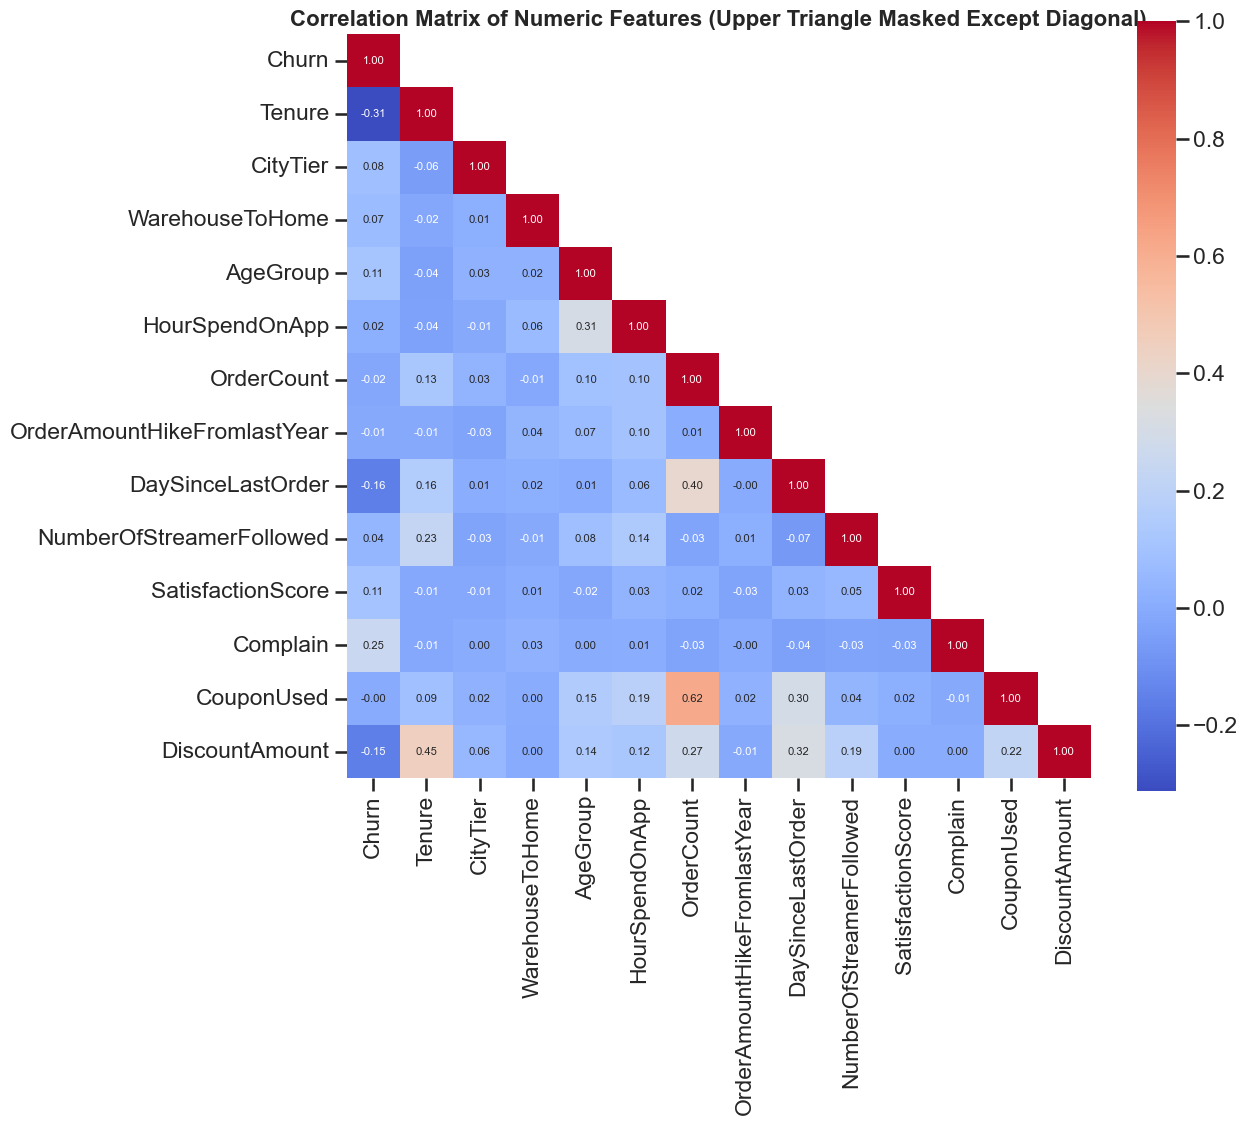

In [71]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.drop(columns=['CustomerID']).corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, 
            annot_kws={"size": 8}, mask=np.triu(correlation_matrix, k=1))
plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold')
plt.show()


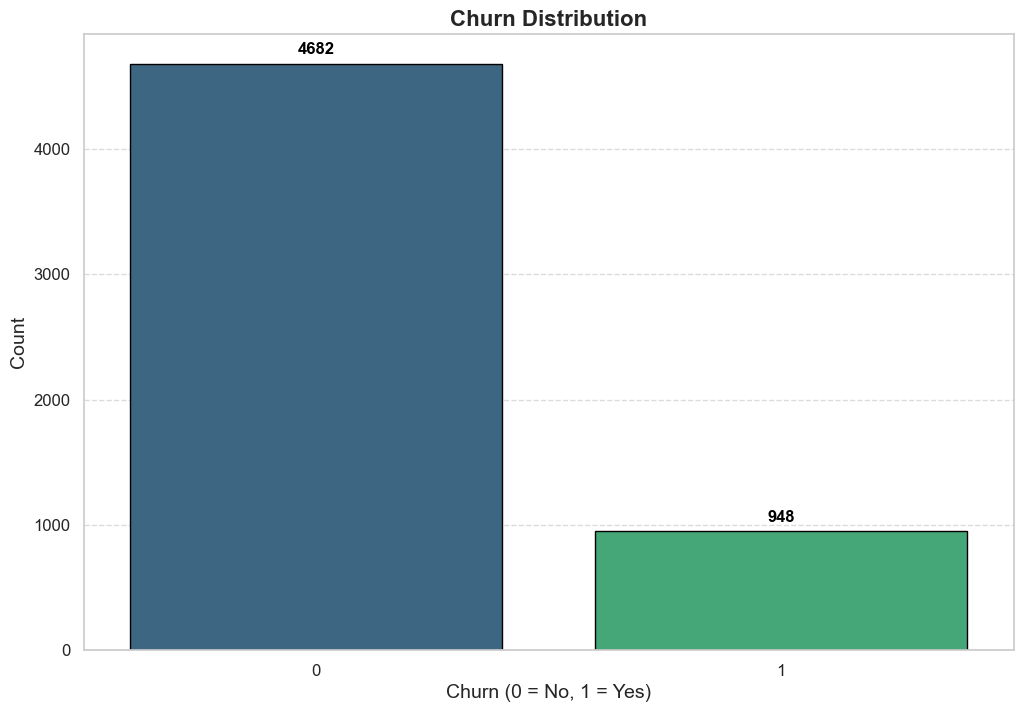

In [3]:
# Set style for more appealing visualizations
sns.set(style='whitegrid')

# Churn Distribution
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Churn', data=df_cleaned, palette='viridis', edgecolor='black')
plt.title('Churn Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, color='black', fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


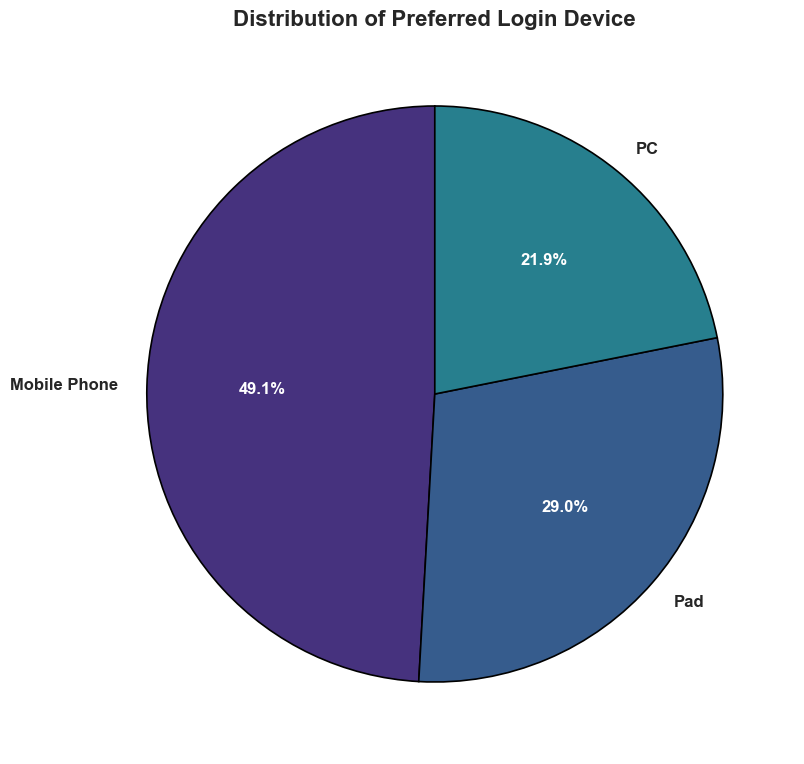

In [4]:
# Distribution of Preferred Login Device
device_counts = df_cleaned['PreferredLoginDevice'].value_counts()
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=90, 
                                    colors=sns.color_palette('viridis'), wedgeprops={'edgecolor': 'black', 'linewidth': 1.2})
plt.title('Distribution of Preferred Login Device', fontsize=16, fontweight='bold')

for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

plt.tight_layout()
plt.gca().set_aspect('equal')
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
plt.show()

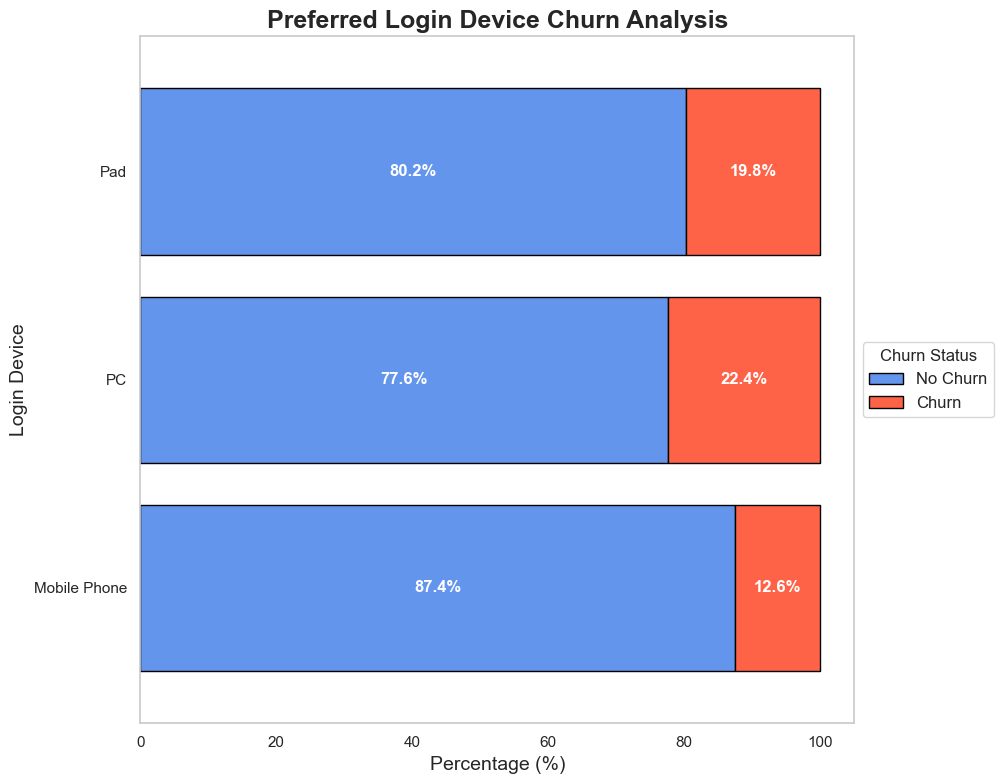

In [5]:
# Churn Rate by Device Type
device_churn = df_cleaned.groupby('PreferredLoginDevice')['Churn'].value_counts(normalize=True).unstack(fill_value=0) * 100
device_churn.columns = ['No Churn', 'Churn']  # Rename columns for easier access

# Plot the data with an updated color scheme and improved layout
ax = device_churn.plot(
    kind='barh', 
    stacked=True, 
    color=['#6495ED', '#FF6347'],  # Use a new color scheme for better contrast and aesthetics
    edgecolor='black', 
    width=0.8, 
    figsize=(12, 8)
)
plt.title('Preferred Login Device Churn Analysis', fontsize=18, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Login Device', fontsize=14)
plt.legend(['No Churn', 'Churn'], title='Churn Status', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)  # Move legend outside

# Add centered percentage labels
for i, (index, row) in enumerate(device_churn.iterrows()):
    # Position the 'No Churn' label at the center of the 'No Churn' bar
    ax.text(row['No Churn'] / 2, i, f'{row["No Churn"]:.1f}%', 
            color='white' if row['No Churn'] > 10 else 'black', va='center', ha='center', fontweight='bold')
    
    # Position the 'Churn' label at the center of the 'Churn' bar
    ax.text(row['No Churn'] + row['Churn'] / 2, i, f'{row["Churn"]:.1f}%', 
            color='white' if row['Churn'] > 10 else 'black', va='center', ha='center', fontweight='bold')

# Set y-axis labels and adjust layout
ax.set_yticks(range(len(device_churn.index)))
ax.set_yticklabels(device_churn.index)
plt.grid(visible=False)  # Remove grid for a cleaner look

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to fit the legend
plt.show()


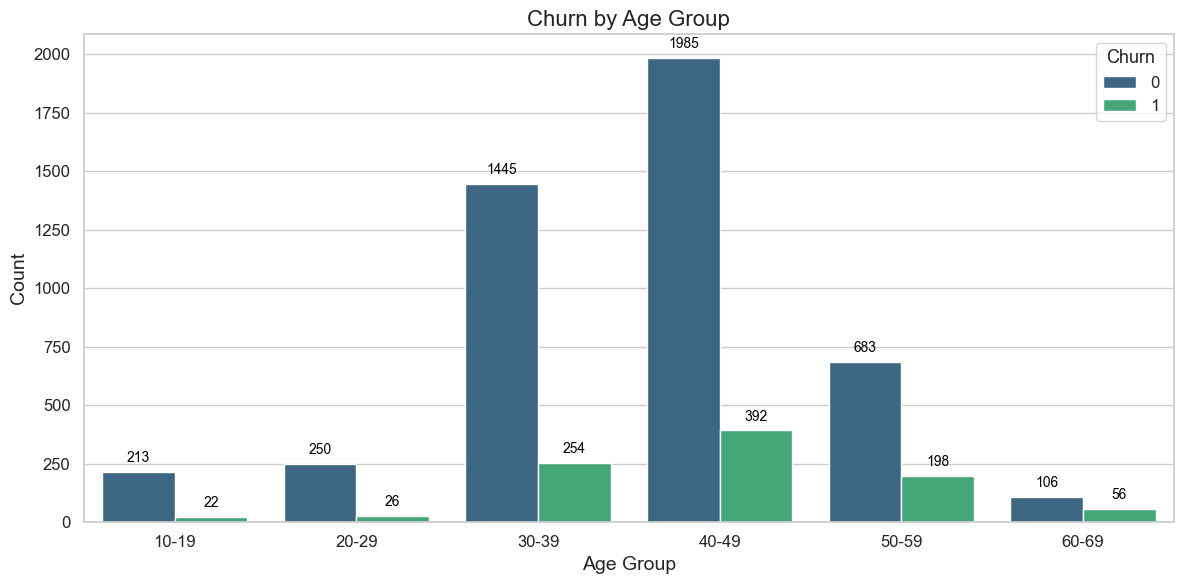

In [17]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")  # Setting a clean style

# Plot the data without remapping AgeGroup
ax = sns.countplot(x='AgeGroup', hue='Churn', data=df_cleaned, palette='viridis')

# Adding count labels to each bar
for p in ax.patches:
    if p.get_height() > 0:  # Only annotate bars with height greater than 0
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=10, color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

# Set custom labels with fixed tick positions
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
plt.xticks(ticks=ax.get_xticks(), labels=age_labels)

# Improving the appearance of the plot
plt.title('Churn by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Churn', fontsize=12, title_fontsize='13')

plt.tight_layout()
plt.show()

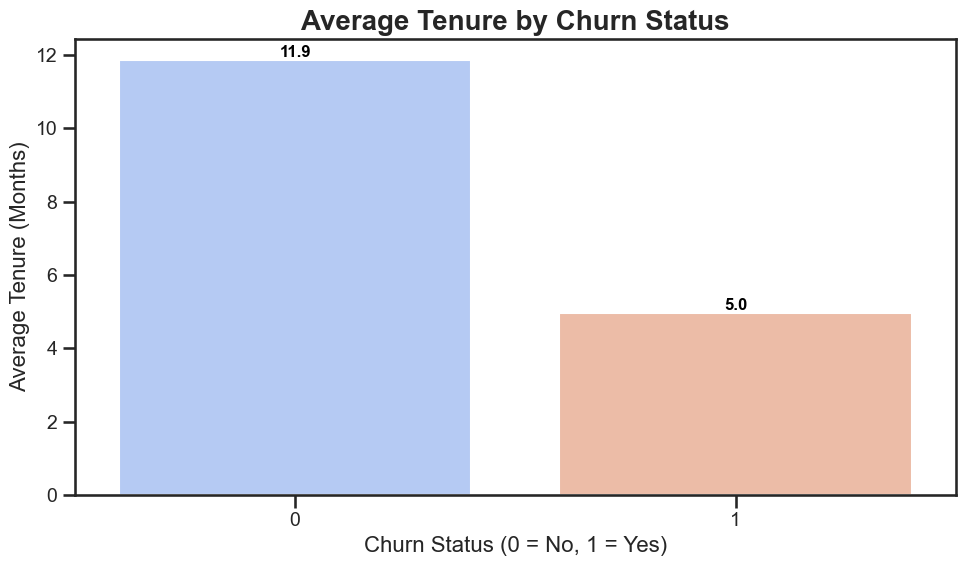

In [24]:
tenure_churn = df_cleaned.groupby('Churn')['Tenure'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.set(style="ticks", context="talk")  # Set a cleaner style and larger context

# Changing to a horizontal barplot for better readability
ax = sns.barplot(x='Churn', y='Tenure', data=tenure_churn, palette='coolwarm')

# Adding count labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height() ),
                ha='center', va='bottom',
                fontsize=12, color='black', weight='bold')

# Improving the appearance of the plot
plt.title('Average Tenure by Churn Status', fontsize=20, weight='bold')
plt.xlabel('Churn Status (0 = No, 1 = Yes)', fontsize=16)
plt.ylabel('Average Tenure (Months)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

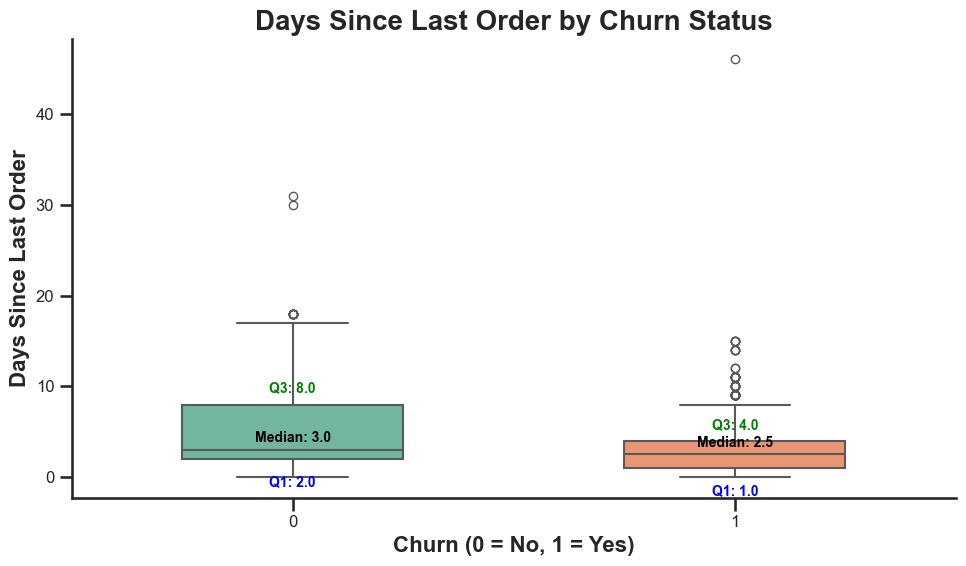

In [45]:

# Days Since Last Order by Churn Status
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", context="talk", font_scale=1.1)  # Set a cleaner style, larger context, and moderate font scale
sns.set(style="ticks", context="talk") 
# Boxplot for Days Since Last Order by Churn Status
ax = sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df_cleaned, palette='Set2', width=0.5, linewidth=1.5, fliersize=6, notch=False)

# Adding statistical labels (median, Q1, Q3) to the boxplot
medians = df_cleaned.groupby(['Churn'])['DaySinceLastOrder'].median().values
q1 = df_cleaned.groupby(['Churn'])['DaySinceLastOrder'].quantile(0.25).values
q3 = df_cleaned.groupby(['Churn'])['DaySinceLastOrder'].quantile(0.75).values

for xtick in range(len(medians)):
    median = medians[xtick]
    ax.text(xtick, median + 0.5, f'Median: {median:.1f}',
            ha='center', va='bottom',
            fontsize=10, color='black', weight='bold')
    ax.text(xtick, q1[xtick] - 1.8, f'Q1: {q1[xtick]:.1f}',
            ha='center', va='top',
            fontsize=10, color='blue', weight='bold')
    ax.text(xtick, q3[xtick] + 1, f'Q3: {q3[xtick]:.1f}',
            ha='center', va='bottom',
            fontsize=10, color='green', weight='bold')

# Improving the appearance of the plot
plt.title('Days Since Last Order by Churn Status', fontsize=20, weight='bold')
plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=16, weight='bold')
plt.ylabel('Days Since Last Order', fontsize=16, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove top and right spines for a cleaner look
sns.despine()

plt.tight_layout()
plt.show()

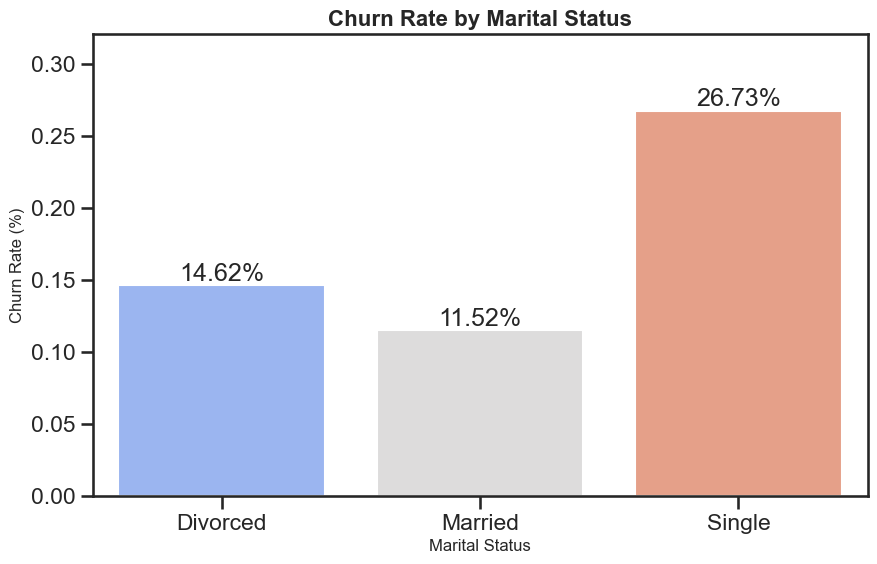

In [46]:
# Churn Rate by Marital Status
churn_rate_per_marital_status = df_cleaned.groupby('MaritalStatus')['Churn'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(
    x='MaritalStatus', 
    y='Churn', 
    data=churn_rate_per_marital_status, 
    palette='coolwarm'
)

for index, row in churn_rate_per_marital_status.iterrows():
    plt.text(index, row['Churn'], f"{row['Churn']:.2%}", ha='center', va='bottom')

plt.title('Churn Rate by Marital Status', fontsize=16, fontweight='bold')
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.ylim(0, churn_rate_per_marital_status['Churn'].max() * 1.2)  
plt.show()

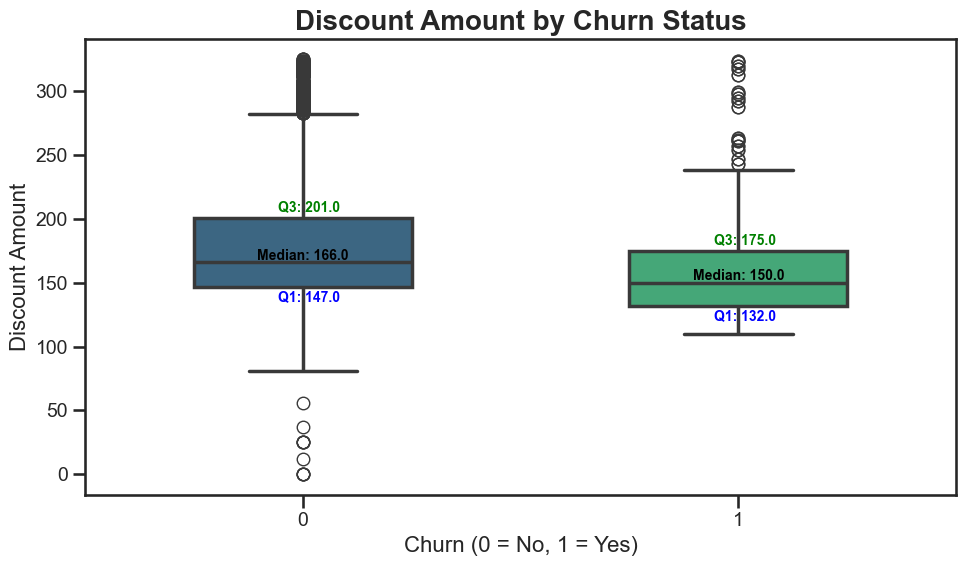

In [78]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", context="talk")  # Set a cleaner style and larger context
sns.set(style="ticks", context="talk") 
# Boxplot for Discount Amount by Churn Status
ax = sns.boxplot(x='Churn', y='DiscountAmount', data=df_cleaned, palette='viridis', width=0.5, linewidth=2.5)

# Adding median labels to the boxplot
medians = df_cleaned.groupby(['Churn'])['DiscountAmount'].median().values
q1 = df_cleaned.groupby(['Churn'])['DiscountAmount'].quantile(0.25).values
q3 = df_cleaned.groupby(['Churn'])['DiscountAmount'].quantile(0.75).values
for xtick, median in enumerate(medians):
    ax.text(xtick, median+5, f'Median: {median:.1f}',
            ha='center', va='center',
            fontsize=10, color='black', weight='bold')
    ax.text(xtick+0.015, q1[xtick] - 3, f'Q1: {q1[xtick]:.1f}',
            ha='center', va='top',
            fontsize=10, color='blue', weight='bold')
    ax.text(xtick+0.015, q3[xtick] + 3, f'Q3: {q3[xtick]:.1f}',
            ha='center', va='bottom',
            fontsize=10, color='green', weight='bold')

# Improving the appearance of the plot
plt.title('Discount Amount by Churn Status', fontsize=20, weight='bold')
plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=16)
plt.ylabel('Discount Amount', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

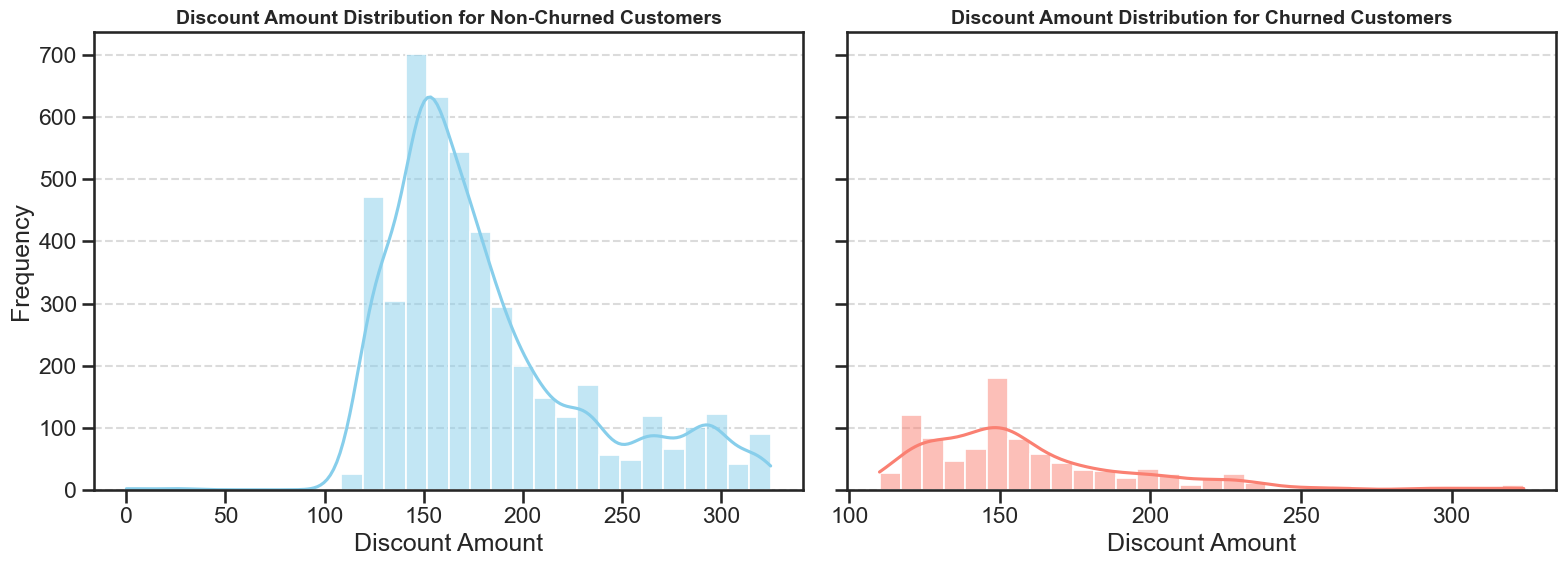

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.histplot(df_cleaned[df_cleaned['Churn'] == 0]['DiscountAmount'], kde=True, color='skyblue', bins=30, ax=axes[0])
axes[0].set_title('Discount Amount Distribution for Non-Churned Customers', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Discount Amount')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)


sns.histplot(df_cleaned[df_cleaned['Churn'] == 1]['DiscountAmount'], kde=True, color='salmon', bins=30, ax=axes[1])
axes[1].set_title('Discount Amount Distribution for Churned Customers', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Discount Amount')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

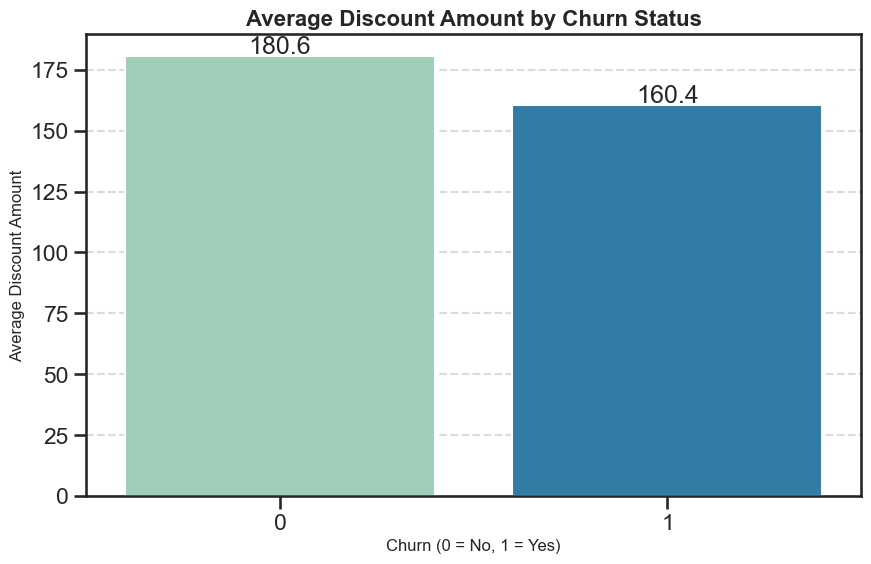

In [54]:
# Average Discount Amount by Churn Status
avg_discount_by_churn = df_cleaned.groupby('Churn')['DiscountAmount'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn', y='DiscountAmount', data=avg_discount_by_churn, palette='YlGnBu')

for index, row in avg_discount_by_churn.iterrows():
    plt.text(index, row['DiscountAmount']-1, f"{row['DiscountAmount']:.1f}", ha='center', va='bottom')

plt.title('Average Discount Amount by Churn Status', fontsize=16, fontweight='bold')
plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Average Discount Amount', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

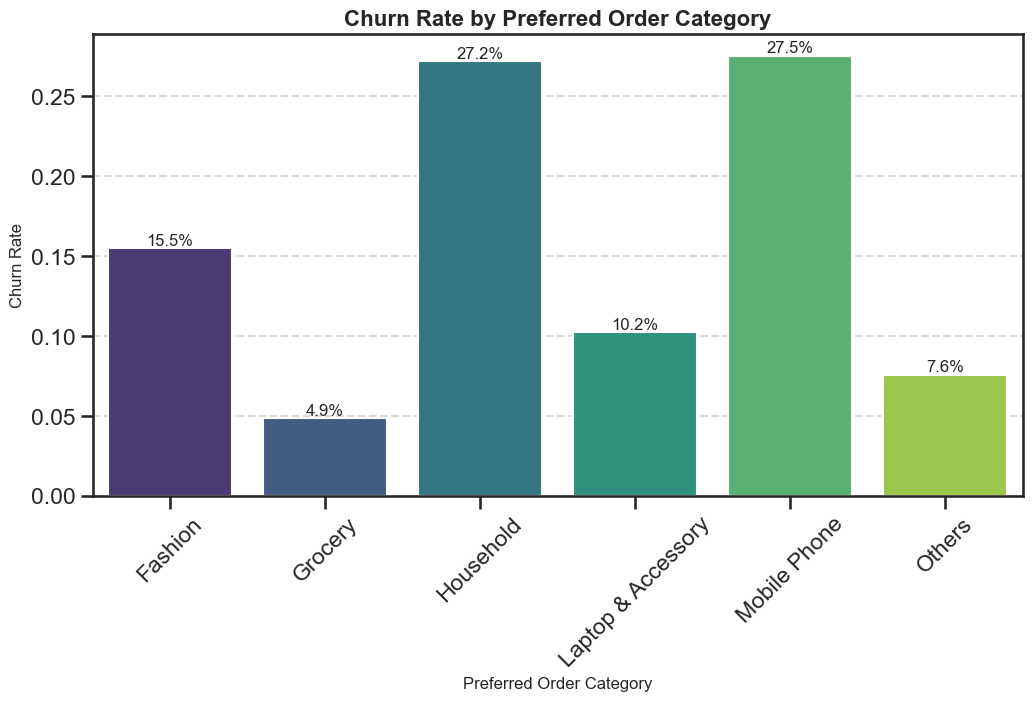

In [63]:

churn_rate_per_order_cat = df.groupby('PreferedOrderCat')['Churn'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='PreferedOrderCat', y='Churn', data=churn_rate_per_order_cat, palette='viridis')
for index, row in churn_rate_per_order_cat.iterrows():
    plt.text(index, row['Churn'], f"{row['Churn'] * 100:.1f}%", ha='center', va='bottom',fontsize=12)


plt.title('Churn Rate by Preferred Order Category', fontsize=16, fontweight='bold')
plt.xlabel('Preferred Order Category', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

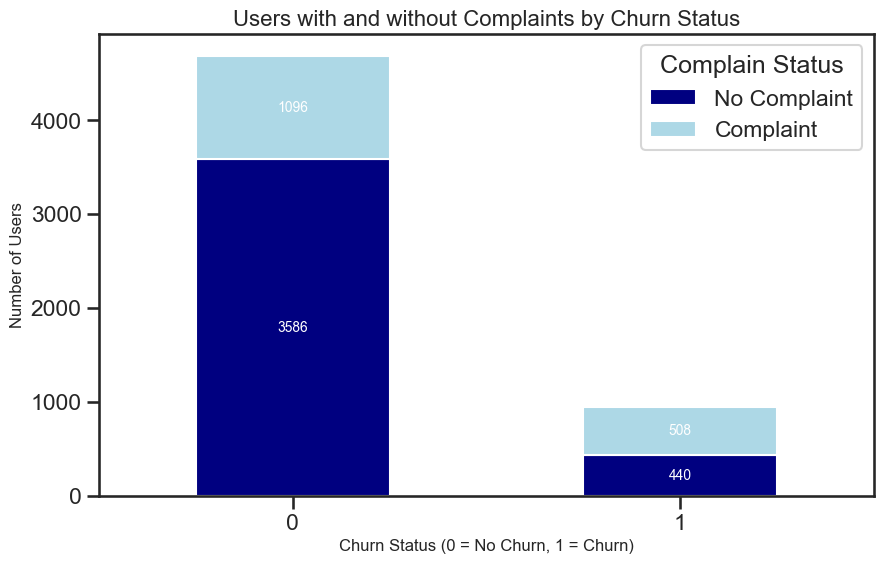

In [72]:
complain_churn_counts = df.groupby(['Churn', 'Complain']).size().unstack()

ax = complain_churn_counts.plot(kind='bar', stacked=True, color=['navy', 'lightblue'], figsize=(10, 6))
plt.title('Users with and without Complaints by Churn Status', fontsize=16)
plt.xlabel('Churn Status (0 = No Churn, 1 = Churn)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.legend(['No Complaint', 'Complaint'], title='Complain Status', loc='upper right')
plt.xticks(rotation=0)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', color='white', fontsize=10)

plt.show()

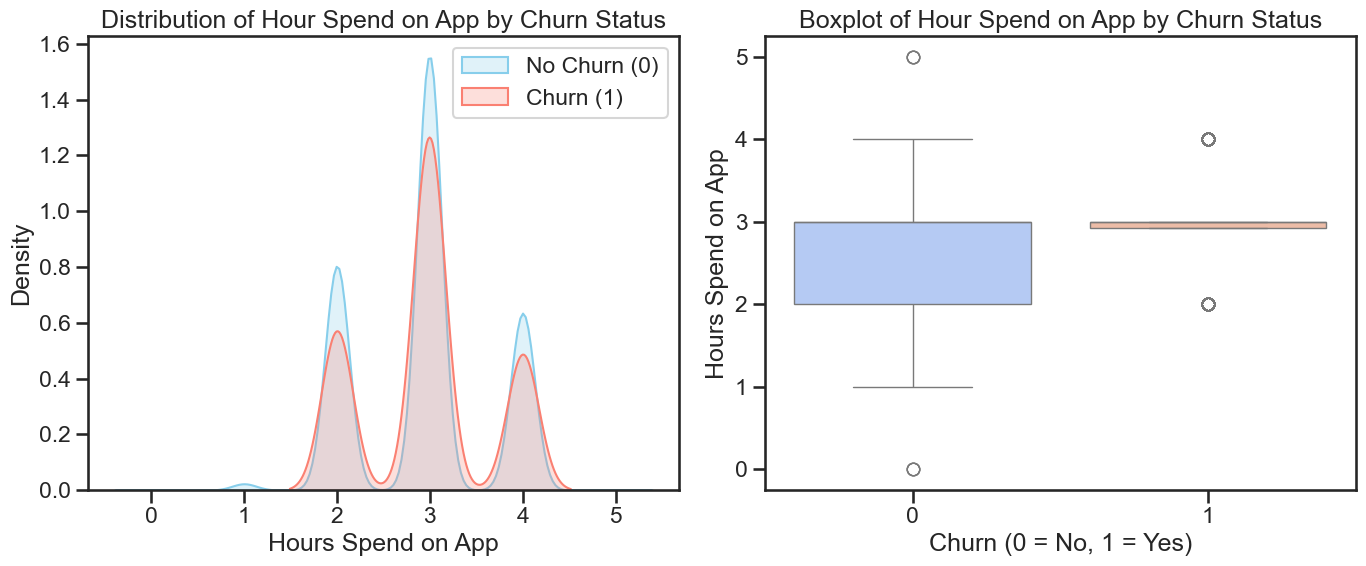

In [75]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.kdeplot(data=df_cleaned[df_cleaned['Churn'] == 0], x='HourSpendOnApp', fill=True, label='No Churn (0)', color='skyblue')
sns.kdeplot(data=df_cleaned[df_cleaned['Churn'] == 1], x='HourSpendOnApp', fill=True, label='Churn (1)', color='salmon')
plt.title('Distribution of Hour Spend on App by Churn Status')
plt.xlabel('Hours Spend on App')
plt.ylabel('Density')
plt.legend()


plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='HourSpendOnApp', data=df_cleaned, palette='coolwarm')
plt.title('Boxplot of Hour Spend on App by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Hours Spend on App')


plt.tight_layout()
plt.show()

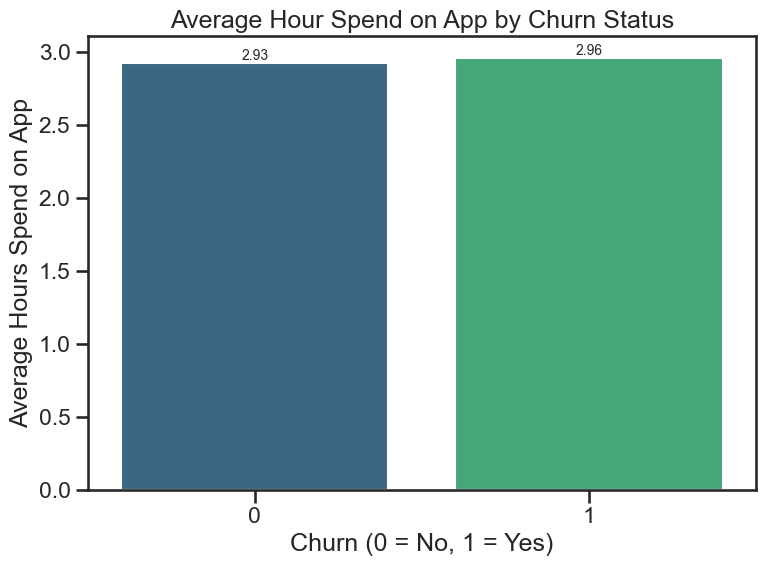

In [76]:
plt.figure(figsize=(8, 6))
mean_values = df_cleaned.groupby('Churn')['HourSpendOnApp'].mean().reset_index()

sns.barplot(x='Churn', y='HourSpendOnApp', data=mean_values, palette='viridis')
plt.title('Average Hour Spend on App by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Average Hours Spend on App')


for index, row in mean_values.iterrows():
    plt.text(index, row['HourSpendOnApp'], f"{row['HourSpendOnApp']:.2f}", ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()

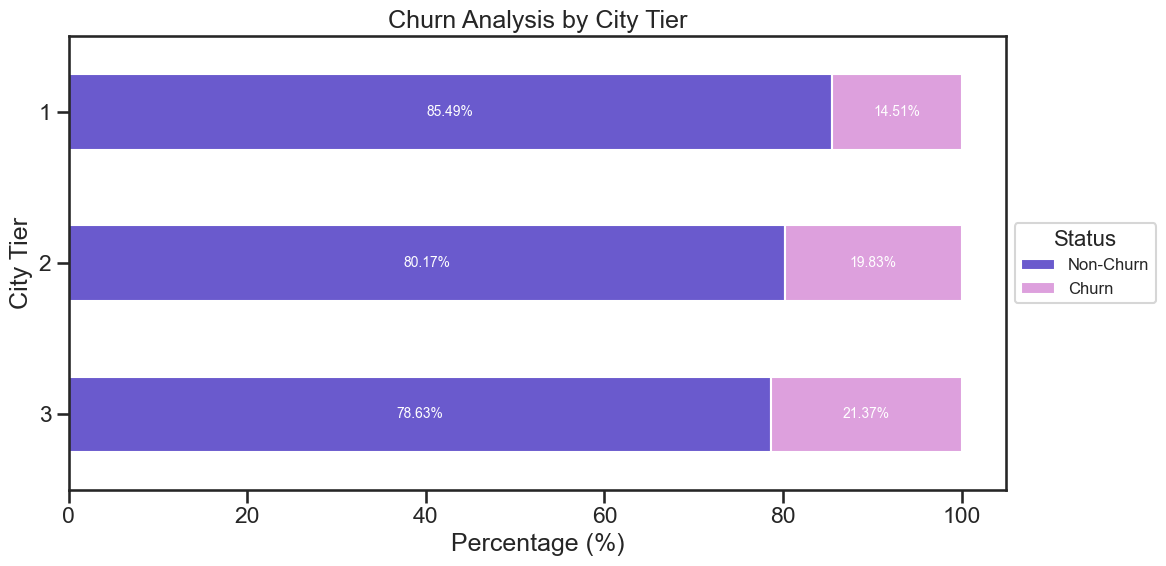

In [88]:
city_tier_churn = df_cleaned.groupby(['CityTier', 'Churn']).size().unstack()
city_tier_churn = city_tier_churn.div(city_tier_churn.sum(axis=1), axis=0) * 100 


plt.figure(figsize=(12, 6))
city_tier_churn.plot(kind='barh', stacked=True, color=['#6A5ACD', '#DDA0DD'], ax=plt.gca())


for index, (non_churn, churn) in enumerate(zip(city_tier_churn[0], city_tier_churn[1])):
    plt.text(non_churn / 2, index, f"{non_churn:.2f}%", ha='center', va='center', color='white', fontsize=10)
    plt.text(non_churn + (churn / 2), index, f"{churn:.2f}%", ha='center', va='center', color='white', fontsize=10)


plt.title('Churn Analysis by City Tier')
plt.xlabel('Percentage (%)')
plt.ylabel('City Tier')


plt.legend(['Non-Churn', 'Churn'], title='Status', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, title_fontsize=16)

plt.gca().invert_yaxis() 

plt.tight_layout()
plt.show()

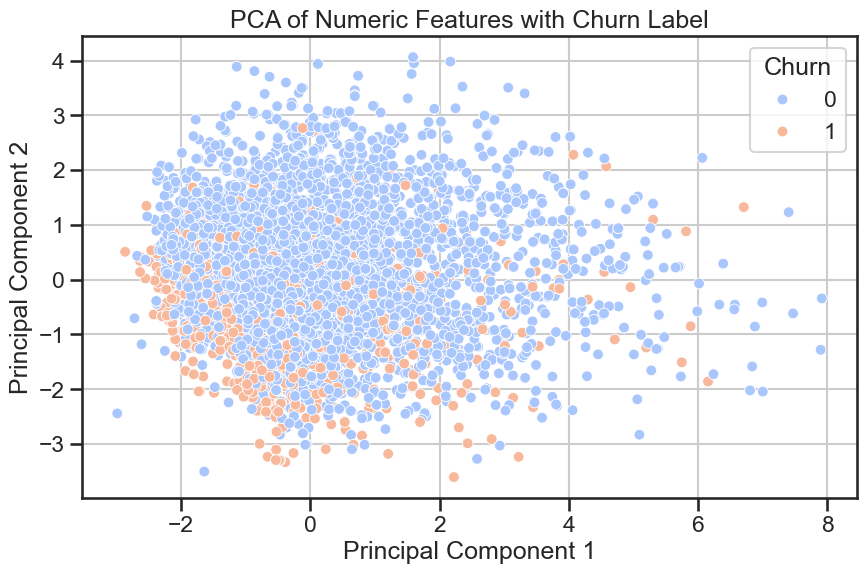

Explained variance by each component: [0.17779635 0.10611559]
Total explained variance: 0.28391193861368463


In [89]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
numeric_features = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['Churn', 'CustomerID'], errors='ignore')


scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)


pca = PCA(n_components=2)  
pca_components = pca.fit_transform(scaled_features)


pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Churn'] = df_cleaned['Churn'].values 


plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Churn', palette='coolwarm', s=60)
plt.title('PCA of Numeric Features with Churn Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Churn')
plt.grid(True)
plt.show()


explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)
print("Total explained variance:", explained_variance.sum())